##### Author: Pablo Iañez Picazo
##### Biomedical Data Science lab

In [1]:
# Load all the necessary libraries
from glob import glob
import numpy as np
import seaborn as sns
import napari

import matplotlib.pyplot as plt
from skimage.io import imread

from methods import seg_utils

In [2]:
# Set visual properties for plotting
sns.set(rc={"figure.figsize": (6, 4)})
sns.set_style("whitegrid")

In [3]:
# Set up parameters
res = 0.1
folder = "data/manual_annot"
conditions = [
    "young",
    "aged",
    "aged_treated_RhoAi",
]

palette = {
    "Young": (0.00392, 0.45098, 0.69803),
    "Aged": (0.00784, 0.61960, 0.45098),
    "Aged + Ri": (0.8, 0.47058, 0.73725),
}

Prepare the Napari viewer for manual segmentation:

In [4]:
viewer = napari.Viewer()

# For each condition
for cond in conditions[2:]:

    # Get a list of image files (CZI format) within the condition directory
    img_list = glob(f"{folder}/{cond}/*.czi", recursive=True)

    # For each image within this condition
    for i, img_path in enumerate(img_list[:1], 1):
        print(img_path)
        im, nuc_mask = seg_utils.czi_image_preprocessing(img_path, res)

        n_ims_out = int(im.shape[0] * 0.2)
        n_down = n_ims_out
        n_up = im.shape[0] - n_ims_out
        print(n_ims_out)

        viewer.add_image(im[n_down:n_up], name=cond)

        # Create an empty labels layer for manual segmentation
        # Initialize with zeros of same shape as image
        manual_labels = np.zeros(im[n_down:n_up].shape, dtype=np.uint16)
        annot_layer = viewer.add_labels(
            manual_labels, name="Manual Segmentation"
        )

        napari.run()

data/manual_annot/aged_treated_RhoAi/20201119expAg+RiH3K9AF488_nuc_42.czi
(18, 1024, 1024)
Rescaling image. New Image Size:  (72, 135, 135)
14


In [5]:
# Compute segmentation metrics to assess the quality of manual annotations
metrics_df = seg_utils.calculate_segmentation_metrics_2D(
    conditions, folder, res
)
metrics_df

data/manual_annot/young/20200130PlaminYoung slide1exp200122_nuc_14.czi
(17, 1024, 1024)
Rescaling image. New Image Size:  (75, 135, 135)
data/manual_annot/young/20191128PlaminYoung_nuc_20.czi
(20, 1024, 1024)
Rescaling image. New Image Size:  (88, 135, 135)
data/manual_annot/young/20230208exp_20230321Y_KLF4cy3_nuc_23.czi
(24, 1024, 1024)
Rescaling image. New Image Size:  (77, 135, 135)
data/manual_annot/aged/20201119expRhoAAF488AgedUntreatedRFPcellsSlide7_nuc_75.czi
(19, 1024, 1024)
Rescaling image. New Image Size:  (76, 135, 135)
data/manual_annot/aged/20191128PlaminAged_nuc_6.czi
(19, 1024, 1024)
Rescaling image. New Image Size:  (84, 135, 135)
data/manual_annot/aged/20201026expAged2Untreated_nuc_36.czi
(27, 1024, 1024)
Rescaling image. New Image Size:  (108, 135, 135)
data/manual_annot/aged_treated_RhoAi/20201119expAg+RiH3K9AF488_nuc_42.czi
(18, 1024, 1024)
Rescaling image. New Image Size:  (72, 135, 135)
data/manual_annot/aged_treated_RhoAi/20211108expAgedRiLTHSCCdk8AF488_nuc_16.cz

,Dice Score,Precision,Recall,Jaccard Score,Specificity,Accuracy,Condition,Nucleus,Slice Index,N slices
0,0.954545,0.993569,0.918471,0.913043,0.993694,0.954973,young,data/manual_annot/young/20200130PlaminYoung sl...,16,49
1,0.976518,0.984808,0.968366,0.954113,0.985211,0.976831,young,data/manual_annot/young/20200130PlaminYoung sl...,17,49
2,0.971061,0.993421,0.949686,0.943750,0.993151,0.970492,young,data/manual_annot/young/20200130PlaminYoung sl...,18,49
3,0.971501,0.989252,0.954376,0.944581,0.988447,0.970492,young,data/manual_annot/young/20200130PlaminYoung sl...,19,49
4,0.972205,0.994105,0.951249,0.945913,0.993311,0.970492,young,data/manual_annot/young/20200130PlaminYoung sl...,20,49
...,...,...,...,...,...,...,...,...,...,...
421,0.936760,0.999143,0.881708,0.881042,0.999361,0.945455,aged_treated_RhoAi,data/manual_annot/aged_treated_RhoAi/20201026e...,51,43
422,0.935865,0.997751,0.881208,0.879461,0.998465,0.947359,aged_treated_RhoAi,data/manual_annot/aged_treated_RhoAi/20201026e...,52,43
423,0.946251,0.985584,0.909938,0.897986,0.991480,0.959654,aged_treated_RhoAi,data/manual_annot/aged_treated_RhoAi/20201026e...,53,43
424,0.946737,0.972765,0.922065,0.898860,0.985760,0.963117,aged_treated_RhoAi,data/manual_annot/aged_treated_RhoAi/20201026e...,54,43


In [6]:
for m in ["Dice Score", "Precision", "Recall"]:
    print(f"\n{m} Statistics:")
    print(metrics_df[m].mean())
    print(metrics_df[m].std())


Dice Score Statistics:
0.9620895335946156
0.016638116531991466

Precision Statistics:
0.9920796622248462
0.007986880476139017

Recall Statistics:
0.9345628004600349
0.03295185603619241


In [7]:
metrics_df = seg_utils.update_labels(metrics_df)

/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


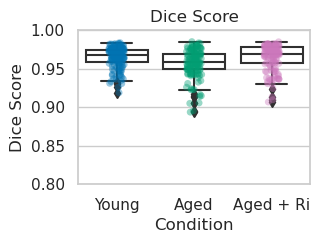

/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


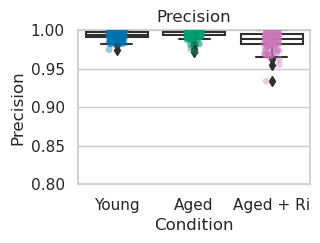

/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


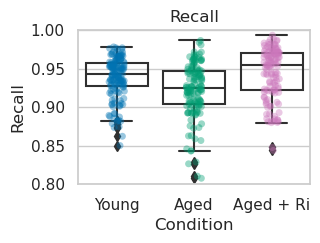

In [8]:
for m in ["Dice Score", "Precision", "Recall"]:

    plt.figure(figsize=(3, 2))
    sns.boxplot(
        data=metrics_df,
        x="Condition",
        y=m,
        palette=palette,
        boxprops=dict(facecolor="none"),
    )
    b = sns.stripplot(
        data=metrics_df,
        x="Condition",
        y=m,
        hue="Condition",
        palette=palette,
        alpha=0.4,
        legend=False,
    )
    b.set_title(m)
    plt.ylim([0.8, 1.0])
    plt.show()

/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pianez/miniconda3/envs/hsc/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarn

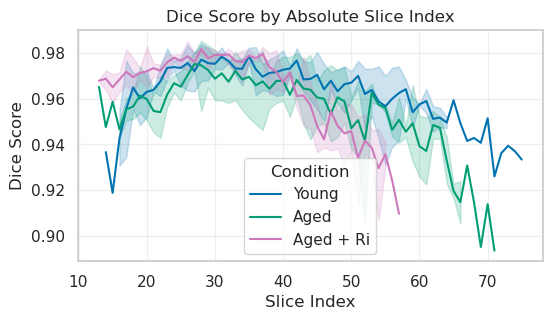

In [9]:
plt.figure(figsize=(6, 3))
sns.lineplot(
    data=metrics_df,
    x="Slice Index",
    y="Dice Score",
    hue="Condition",
    palette=palette,
)
plt.title("Dice Score by Absolute Slice Index")
plt.xlabel("Slice Index")
plt.ylabel("Dice Score")
plt.legend(title="Condition")
plt.grid(True, alpha=0.3)
plt.show()

data/manual_annot/young/20200130PlaminYoung slide1exp200122_nuc_14.czi
(17, 1024, 1024)
Rescaling image. New Image Size:  (75, 135, 135)


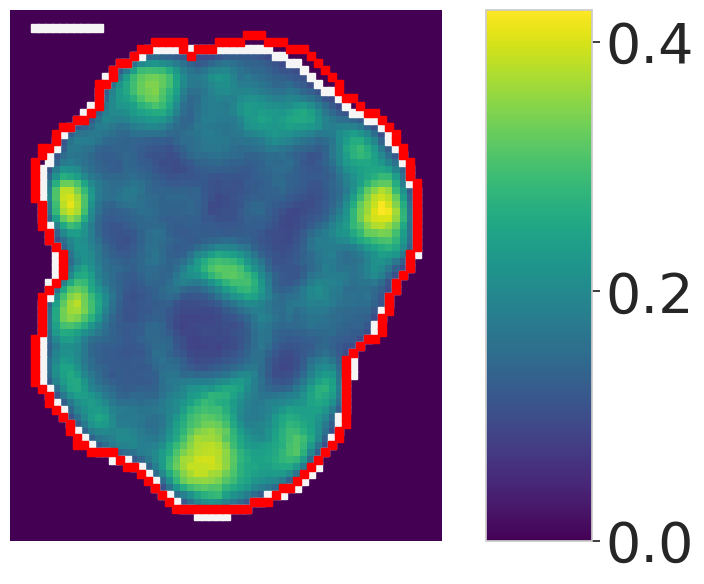

data/manual_annot/aged/20201119expRhoAAF488AgedUntreatedRFPcellsSlide7_nuc_75.czi
(19, 1024, 1024)
Rescaling image. New Image Size:  (76, 135, 135)


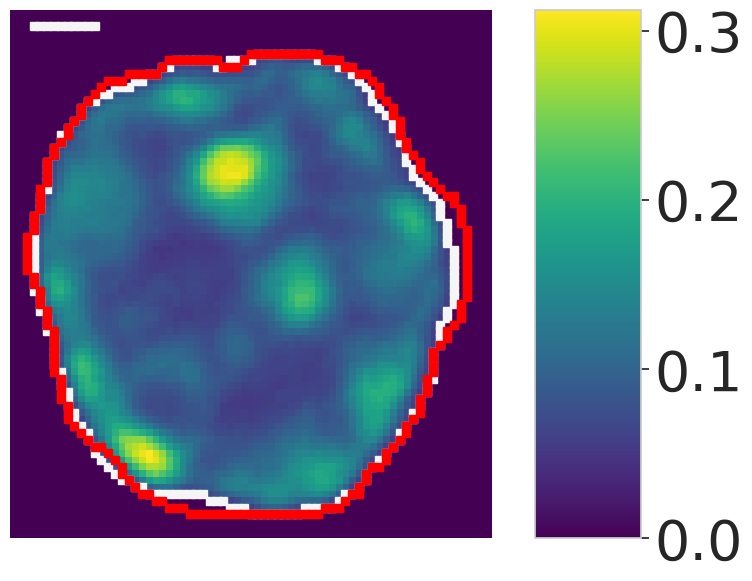

data/manual_annot/aged_treated_RhoAi/20201119expAg+RiH3K9AF488_nuc_42.czi
(18, 1024, 1024)
Rescaling image. New Image Size:  (72, 135, 135)


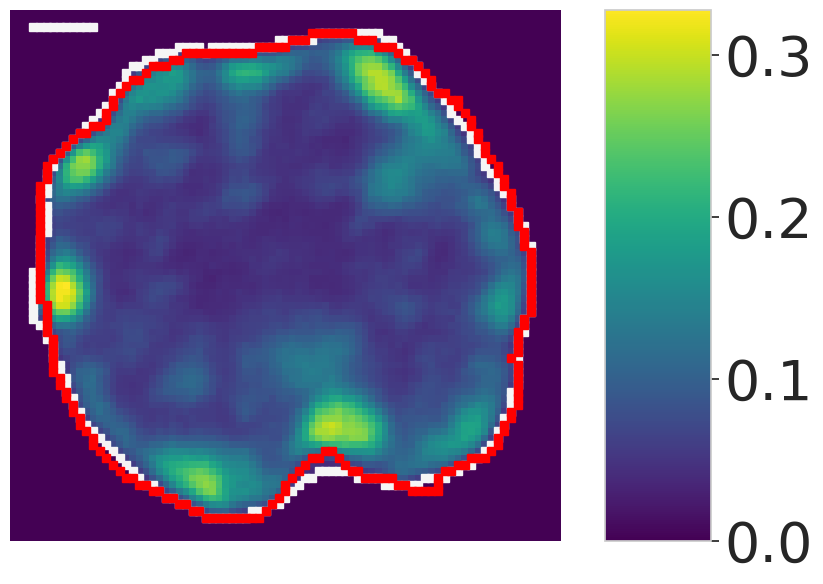

In [10]:
# Check in some example slides the overlap of both the automatic
# segmentation using Otsu and the manual annotation
for cond in conditions:
    img_list = glob(f"{folder}/{cond}/*.czi", recursive=True)

    for img_path in img_list[:1]:
        print(img_path)
        annot_path = img_path.replace(".czi", ".tif")

        im, nuc_mask = seg_utils.czi_image_preprocessing(img_path, res)
        im = im * nuc_mask
        manual_annot = imread(annot_path)

        n_down = int(im.shape[0] * 0.2)
        im, nuc_mask, manual_annot = (
            im[35],
            nuc_mask[35],
            manual_annot[35 - n_down],
        )

        ax = seg_utils.plot_masks_contour(im, nuc_mask, manual_annot)
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()